# PREPARATION

In [1]:
import gzip, idx2numpy, pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [2]:
# FIX CONSTANT
CLASS = 17
THRESH = 100
MAX_EPOCHS = 50
N_SAMPLE_PLOT = 10
PICKLE_FILE = 'dataset/data.pickle'
MAP_SYMBOLS = {'+': 10, '-': 11, 
              'x': 12, '/': 13, 
              '(': 14, ')': 15, 
              ',': 16}
VEC_SYMBOLS = np.vectorize(MAP_SYMBOLS.get)

# LOAD DATA

In [3]:
# LOAD TRAIN AND TEST DATA
data = ['train-images-idx3-ubyte.gz', 'train-labels-idx1-ubyte.gz', 't10k-images-idx3-ubyte.gz', 't10k-labels-idx1-ubyte.gz']

for idx, filename in enumerate(data):
     with gzip.open('dataset/' + filename, 'rb') as f:
        temp = f.read()
        data[idx] = idx2numpy.convert_from_string(temp)

[X_train, y_train_label, X_test, y_test_label] = data
# print Train and Test data size
print('Train:', X_train.shape, y_train_label.shape)
print('Test: ', X_test.shape, y_test_label.shape)

Train: (60000, 28, 28) (60000,)
Test:  (10000, 28, 28) (10000,)


Each sample data is 28x28 pixel of handwritten image, convert to numpy array consist of integer between 0-255

In [4]:
# APPEND MNIST TRAIN AND TEST DATA
X_train = np.append(X_train, X_test, axis=0)
y_train_label = np.append(y_train_label, y_test_label, axis=0)
print('Train:', X_train.shape, y_train_label.shape)

Train: (70000, 28, 28) (70000,)


In [5]:
def thresholding(x, thresh):
    """Masking image for simplify data.
    Convert data to binary, each pixel greater or equal to threshold will convert as 1
    """
    if x >= thresh:
        temp = 1
    else:
        temp = 0
    return temp
thresholding_v = np.vectorize(thresholding)

In [6]:
# Masking feature data
X_train = thresholding_v(X_train, THRESH)

In [7]:
# Reshape each sample to 1 dimension
X_train = X_train.reshape(70000, -1)

In [8]:
# LOAD SYMBOL DATA
with open(PICKLE_FILE, 'rb') as f:
    symbol_train = pickle.load(f)

Xs_train = np.array(symbol_train['img'])
ys_train_label = VEC_SYMBOLS(np.array(symbol_train['label']))
print('Symbol:', Xs_train.shape, ys_train_label.shape)

Symbol: (4900, 28, 28) (4900,)


In [9]:
Xs_train = Xs_train.reshape(4900, -1)

In [10]:
temp = Xs_train
temp_label = ys_train_label
for i in range(9):
    temp = np.append(temp, Xs_train, axis=0)
    temp_label = np.append(temp_label, ys_train_label, axis=0)
print(temp.shape, temp_label.shape)
Xs_train = temp
ys_train_label = temp_label

(49000, 784) (49000,)


In [11]:
X_train = np.append(X_train, Xs_train, axis=0)
y_train_label = np.append(y_train_label, ys_train_label, axis=0)

In [12]:
print(X_train.shape, y_train_label.shape)

(119000, 784) (119000,)


In [13]:
# One hot encode label data
y_train = np.eye(CLASS)[y_train_label]

# TRAIN MODEL

In [14]:
# CREATE MODEL 
model = Sequential()
model.add(Dense(20, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(20, activation='relu'))
model.add(Dense(CLASS, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 20)                15700     
_________________________________________________________________
dense_2 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_3 (Dense)              (None, 17)                357       
Total params: 16,477
Trainable params: 16,477
Non-trainable params: 0
_________________________________________________________________


In [15]:
history = model.fit(X_train, y_train, epochs=MAX_EPOCHS, verbose=0)

In [16]:
print ("train score: ",round(model.evaluate(X_train, y_train)[1]*100, 2) , "%")

119000/119000 [==============================] - 5s 38us/step
train score:  99.09 %


In [17]:
model.save('model.h5')

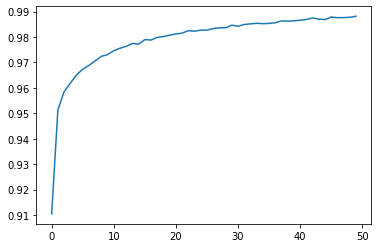

In [18]:
# Plot accuracy train vs test data
plt.plot(history.history['accuracy'])